<a href="https://colab.research.google.com/github/superpanditas/BI-booster/blob/main/Netflix_Movies_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0: Getting Started

In [1]:
#@title Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# @titl|e Load Data
df_netflix = pd.read_csv('/content/data_netflix.csv')
df_best_movies = pd.read_csv('/content/mejores peliculas Netflix.csv')
df_best_shows = pd.read_csv('/content/mejores Shows Netflix.csv')
df_actores = pd.read_csv('/content/Actores.csv')

# Step 1: Dataset Overview

In [5]:
# @title Netflix Data Info
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   release_year          5806 non-null   int64  
 4   age_certification     3196 non-null   object 
 5   runtime               5806 non-null   int64  
 6   genres                5806 non-null   object 
 7   production_countries  5806 non-null   object 
 8   seasons               2047 non-null   float64
 9   imdb_id               5362 non-null   object 
 10  imdb_score            5283 non-null   float64
 11  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 544.4+ KB


In [6]:
# @title Netflix Best Movies Info
df_best_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TITLE            387 non-null    object 
 1   RELEASE_YEAR     387 non-null    int64  
 2   SCORE            387 non-null    float64
 3   NUMBER_OF_VOTES  387 non-null    int64  
 4   DURATION         387 non-null    int64  
 5   MAIN_GENRE       387 non-null    object 
 6   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.3+ KB


In [7]:
# @title Netflix Best Shows Info
df_best_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              246 non-null    object 
 1   RELEASE_YEAR       246 non-null    int64  
 2   SCORE              246 non-null    float64
 3   NUMBER_OF_VOTES    246 non-null    int64  
 4   DURATION           246 non-null    int64  
 5   NUMBER_OF_SEASONS  246 non-null    int64  
 6   MAIN_GENRE         246 non-null    object 
 7   MAIN_PRODUCTION    246 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.5+ KB


In [8]:
# @title Netflix Actors
df_actores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


# Step 2: Exploratory Data Analyst
- Let's merge df_best_movies.csv, df_best_shows.csv, and df_netflix using left join

In [9]:
df_netflix = df_netflix.rename(columns={'title':'TITLE'})

df_netflix_best_movies = pd.merge(df_netflix, df_best_movies,
                                  on='TITLE', how='left')
df_all_netflix = pd.merge(df_netflix_best_movies, df_best_shows,
                          on='TITLE', how='left', suffixes=('_movies', '_shows'))

df_all_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5806 non-null   object 
 1   TITLE                   5805 non-null   object 
 2   type                    5806 non-null   object 
 3   release_year            5806 non-null   int64  
 4   age_certification       3196 non-null   object 
 5   runtime                 5806 non-null   int64  
 6   genres                  5806 non-null   object 
 7   production_countries    5806 non-null   object 
 8   seasons                 2047 non-null   float64
 9   imdb_id                 5362 non-null   object 
 10  imdb_score              5283 non-null   float64
 11  imdb_votes              5267 non-null   float64
 12  RELEASE_YEAR_movies     397 non-null    float64
 13  SCORE_movies            397 non-null    float64
 14  NUMBER_OF_VOTES_movies  397 non-null    

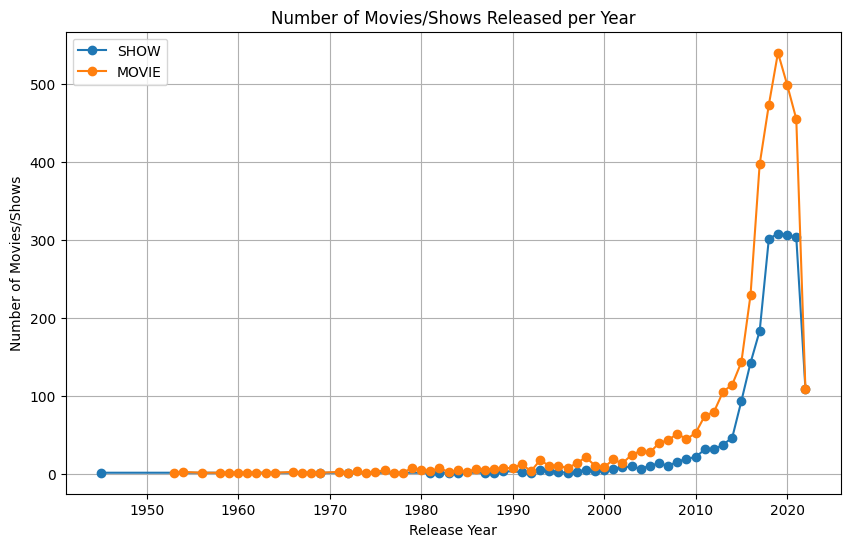

In [10]:
# @title Number of Movies/Shows Realeased per Year
df_grouped = df_all_netflix.groupby(['release_year', 'type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
for show_type in df_grouped['type'].unique():
    subset = df_grouped[df_grouped['type'] == show_type]
    plt.plot(subset['release_year'], subset['count'], label=show_type, marker='o')

plt.xlabel('Release Year')
plt.ylabel('Number of Movies/Shows')
plt.title('Number of Movies/Shows Released per Year')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# @title Stats of runtime, imdb_score, and imdb_votes
numerics_features = ['runtime', 'imdb_score', 'imdb_votes']
df_all_netflix[numerics_features].describe().round(2)

,runtime,imdb_score,imdb_votes
count,5806.00,5283.00,5267.00
mean,77.64,6.53,23407.19
std,39.47,1.16,87134.32
min,0.00,1.50,5.00
25%,44.00,5.80,521.00
50%,84.00,6.60,2279.00
75%,105.00,7.40,10144.00
max,251.00,9.60,2268288.00


In [12]:
import ast

def explode_genres(df):

    df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    df_exploded = df.explode('genres')

    df_exploded.rename(columns={'genres': 'genre'}, inplace=True)

    return df_exploded

df_all_netflix_exploded = explode_genres(df_all_netflix)

# print(df_all_netflix_exploded.head())

In [14]:
features = ['TITLE', 'runtime', 'type', 'release_year', 'genre', 'MAIN_GENRE_movies', 'MAIN_GENRE_shows', 'imdb_score', 'imdb_votes']
df_genres = df_all_netflix_exploded[features]

In [16]:
df_genres_grouped = df_genres.groupby(['release_year','genre']).size().reset_index(name='count')
df_genres_grouped = df_genres_grouped.sort_values(by='count', ascending=False)
df_genres_grouped.head(10)

,release_year,genre,count
622,2019,drama,424
603,2018,drama,369
660,2021,drama,361
641,2020,drama,360
619,2019,comedy,301
600,2018,comedy,297
584,2017,drama,280
638,2020,comedy,262
581,2017,comedy,257
657,2021,comedy,249


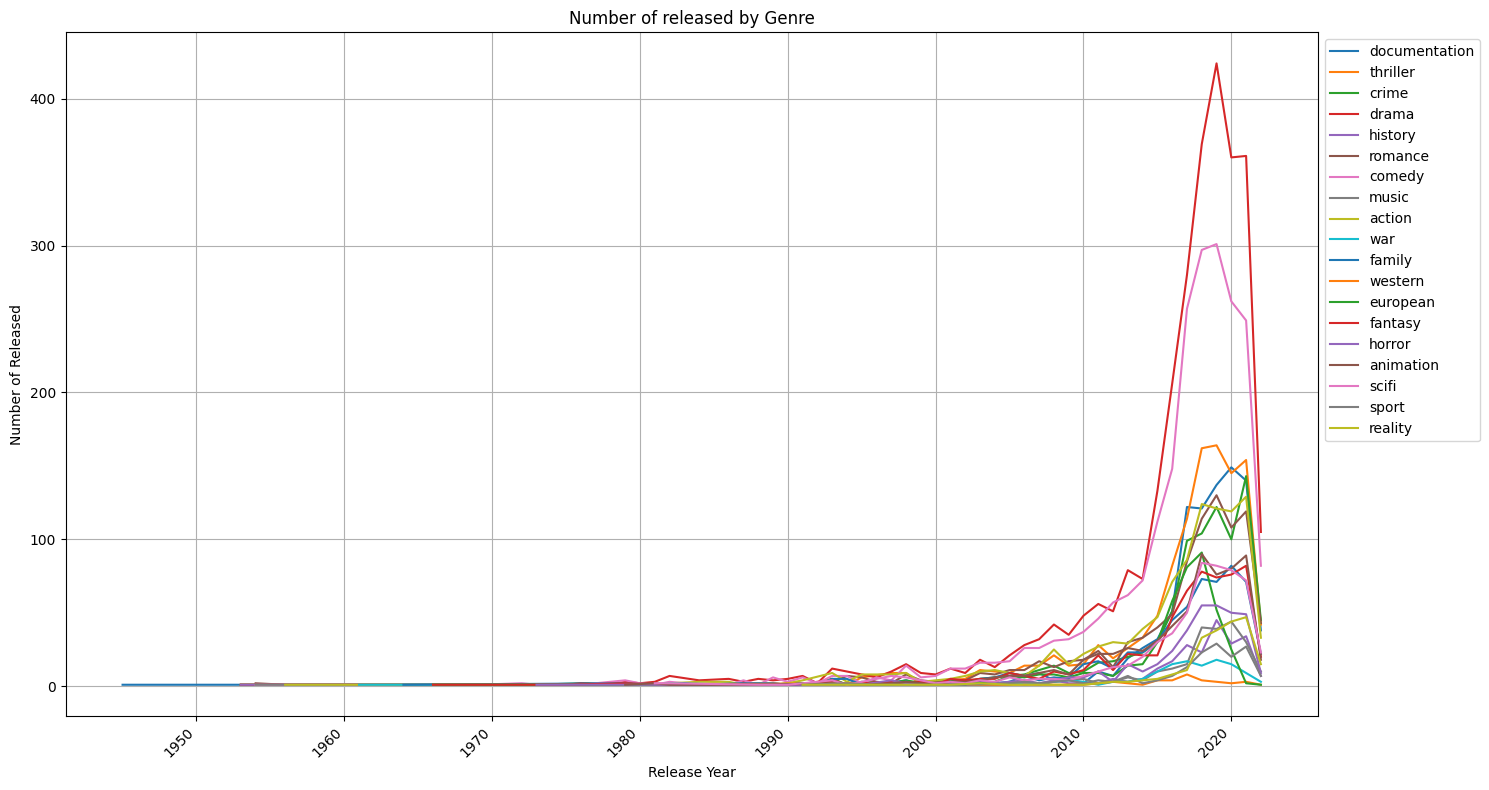

In [17]:
# @title Number of released by Genre
df_genres_grouped = df_genres_grouped.sort_values(by='release_year')

plt.figure(figsize=(15, 8))

for genre in df_genres_grouped['genre'].unique():

    genre_data = df_genres_grouped[df_genres_grouped['genre'] == genre]

    plt.plot(genre_data['release_year'], genre_data['count'], label=genre)

plt.xlabel('Release Year')
plt.ylabel('Number of Released')
plt.title('Number of released by Genre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# @title Stats by genre
df_genres_stats = df_genres.groupby(['genre']).agg(
    count=('TITLE', 'count'),
    runtime_mean=('runtime', 'mean'),
    runtime_median=('runtime', 'median'),
    runtime_max=('runtime', 'max'),
    imdb_votes_sum=('imdb_votes', 'sum'),
    imdb_score_mean=('imdb_score', 'mean'),
    imdb_votes_mean=('imdb_votes', 'mean'),
    imdb_score_median=('imdb_score', 'median'),
    imdb_votes_median=('imdb_votes', 'median'),
    imdb_score_min=('imdb_score', 'min'),
    imdb_votes_min=('imdb_votes', 'min'),
    imdb_score_max=('imdb_score', 'max'),
    imdb_votes_max=('imdb_votes', 'max')
).reset_index()

df_genres_stats.sort_values(by='imdb_votes_sum', ascending=False).head(18).round(2)

,genre,count,runtime_mean,runtime_median,runtime_max,imdb_votes_sum,imdb_score_mean,imdb_votes_mean,imdb_score_median,imdb_votes_median,imdb_score_min,imdb_votes_min,imdb_score_max,imdb_votes_max
5,drama,2901,87.58,95.0,240,85789109.0,6.66,30959.62,6.8,3774.0,1.5,5.0,9.5,1994599.0
16,thriller,1178,91.35,96.5,209,53485339.0,6.36,47123.65,6.4,8078.0,1.5,6.0,9.5,2268288.0
0,action,1053,82.52,92.0,213,40266434.0,6.46,39399.64,6.5,5052.0,1.7,5.0,9.3,2268288.0
2,comedy,2269,75.18,80.0,251,38310238.0,6.42,17810.43,6.5,2110.0,1.6,5.0,9.3,1994599.0
3,crime,891,86.37,92.0,240,31150732.0,6.68,35723.32,6.8,5932.5,2.1,8.0,9.5,1727694.0
14,scifi,587,58.66,45.0,164,27044249.0,6.58,48293.30,6.6,6824.5,1.5,6.0,9.3,2268288.0
13,romance,958,95.96,101.0,224,21203093.0,6.44,22532.51,6.5,3059.0,1.6,8.0,9.2,1994599.0
8,fantasy,631,65.33,63.0,177,20209084.0,6.58,32753.78,6.6,4064.0,1.7,5.0,9.3,989090.0
10,horror,380,82.54,91.0,196,16509207.0,6.01,45479.91,5.9,10705.0,2.3,6.0,9.0,989090.0
6,european,460,88.84,95.0,240,13646393.0,6.54,30804.50,6.6,3647.0,1.7,15.0,8.9,644336.0


In [ ]:
df_genres.to_csv('df_genres.csv', index=False)

In [19]:
df_all_netflix_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 0 to 5805
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14626 non-null  object 
 1   TITLE                   14625 non-null  object 
 2   type                    14626 non-null  object 
 3   release_year            14626 non-null  int64  
 4   age_certification       8974 non-null   object 
 5   runtime                 14626 non-null  int64  
 6   genre                   14558 non-null  object 
 7   production_countries    14626 non-null  object 
 8   seasons                 5595 non-null   float64
 9   imdb_id                 14063 non-null  object 
 10  imdb_score              13938 non-null  float64
 11  imdb_votes              13920 non-null  float64
 12  RELEASE_YEAR_movies     1194 non-null   float64
 13  SCORE_movies            1194 non-null   float64
 14  NUMBER_OF_VOTES_movies  1194 non-null   floa